# UMAP & Watershed Plots

## UMAP Embeddings

In [1]:
# graph-tool native installation
import sys
sys.path.append('/opt/homebrew/opt/graph-tool/lib/python3.11/site-packages')
from graph_tool.draw.cairo_draw import graph_draw

import os
from data_factory import utils
import data_factory.plotting
from data_factory.plotting import * 

/opt/homebrew/opt/graph-tool/lib/python3.11/site-packages/graph_tool/draw/cairo_draw.py:1544: RuntimeWarning: Error importing Gtk module: No module named 'gi'; GTK+ drawing will not work.
  warnings.warn(msg, RuntimeWarning)
/Users/marv/Documents/work/soi/fishtoolbox/.venv/lib/python3.10/site-packages/umap_learn-0.5.3-py3.10.egg/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/Users/marv/Documents/work/soi/fishtoolbox/.venv/lib/python3.10/site-packages/umap_learn-0.5.3-py3.10.egg/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for thi

In [2]:
parameters = utils.set_parameters()
days = ['20210911', '20210912', '20210913', '20210914', '20210915', '20210916', '20210917', '20210918', '20210919', '20210920', '20210921', '20210922', '20210923', '20210924', '20210925', '20210926', '20210927', '20210928', '20210929', '20210930', '20211001', '20211002', '20211003', '20211004', '20211005', '20211006', '20211007', '20211008']
fish_keys = ['23442333_back', '23484201_back', '23484204_back', '23520257_back', '23520258_back', '23520264_back', '23520266_back', '23520268_back', '23520270_back', '23520276_back', '23520278_back', '23520289_back', '23442333_front', '23484201_front', '23484204_front', '23520257_front', '23520258_front', '23520264_front', '23520266_front', '23520268_front', '23520270_front', '23520276_front', '23520278_front', '23520289_front']
projectPath = parameters.projectPath
BLOCK = "block1"
fk_list = utils.get_individuals_keys(parameters=parameters, block='block1')
day_list = utils.get_days(parameters= parameters)

Skipping, path already exists : /Users/marv/Documents/work/soi/data_backup/Fish_moves_new
Skipping, path already exists : /Users/marv/Documents/work/soi/data_backup/Fish_moves_new/Projections
Skipping, path already exists : /Users/marv/Documents/work/soi/data_backup/Fish_moves_new/TSNE_Projections
Skipping, path already exists : /Users/marv/Documents/work/soi/data_backup/Fish_moves_new/TSNE
Skipping, path already exists : /Users/marv/Documents/work/soi/data_backup/Fish_moves_new/UMAP


In [3]:
wshed_path = os.path.join(projectPath, 'UMAP', 'zVals_wShed_groups_20.mat')
wshed_dict = load_watershed_file(wshed_path)

In [598]:
import importlib
importlib.reload(data_factory.plotting)
from data_factory.plotting import * 

### scatter for one individual / day

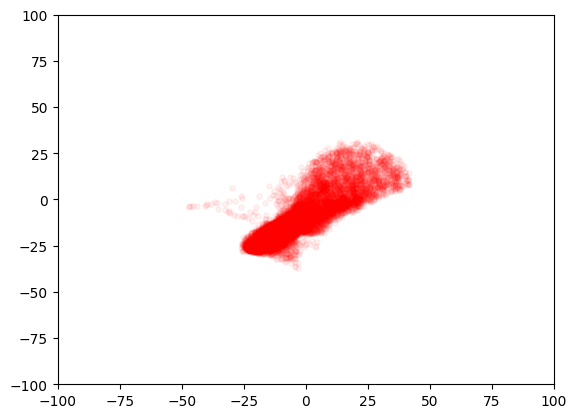

In [5]:
%matplotlib inline

# fig, ax = plt.subplots()

fig_scatter_one, ax_scatter_one = get_umap_scatter_figure_per_fk_day(
    parameters = parameters,
    fish_key = fk_list[0],
    day = day_list[0],
    figure_color='red',
    point_size = 15,
    alpha_transparency = 0.05,
    data_restriction={'nth_value': 10},
    axis_limit_tuple = ([-100, 100], [-100, 100]),
    overloaded_figure= None,
    include_axis_visualization = True, 
    plot_figure = False
)

### scatter over all datasets

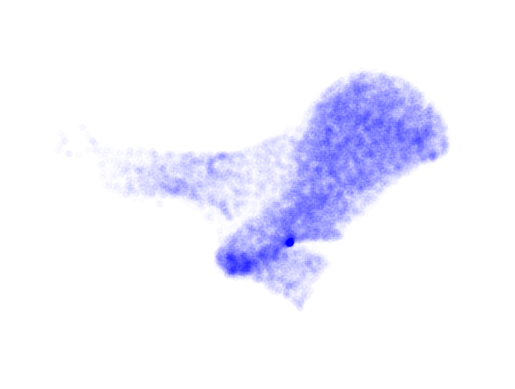

In [587]:
# fig, ax = plt.subplots()

fig_scatter_all, ax_scatter_all = umap_scatter_figure_for_all(
    parameters = parameters, 
    point_size = 15,
    alpha_transparency = 0.01,
    figure_color= 'blue',
    data_restriction = {'nth_value': 10000}, 
    elements_restriction = None,
    axis_limit_tuple = ([-90, 60], [-60, 50]),
    overloaded_figure= None, 
    include_axis_visualization = False, 
    save_pdf_path= '/Users/marv/Documents/work/soi/data_backup/Fish_moves_new/plasticity/trajectory_entropy/umap_scatter_plot.pdf',
    plot_figure = False
)

### UMAP Density

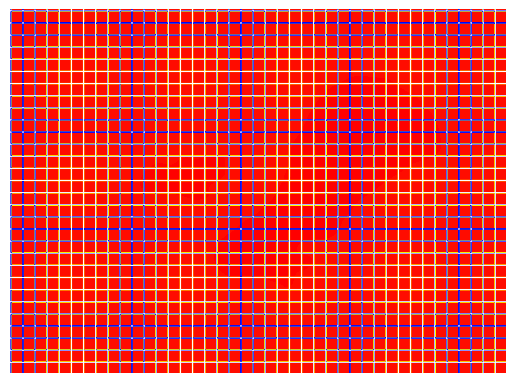

In [622]:
import importlib
importlib.reload(data_factory.plotting)
from data_factory.plotting import *  
%matplotlib inline

fig_density, ax_density = get_umap_density_figure(
    umap_embedding = wshed_dict['density'], 
    extent_factor = wshed_dict['xx'][0][-1], 
    axis_limit_tuple = ([-90, 60], [-60, 50]),
    overloaded_figure=None, 
    include_axis_visualization = False, 
    # save_pdf_path= '/Users/marv/Documents/work/soi/data_backup/Fish_moves_new/plasticity/trajectory_entropy/umap_density_plot.pdf',
    plot_figure = False
)

### UMAP Density + Watershed Boundaries

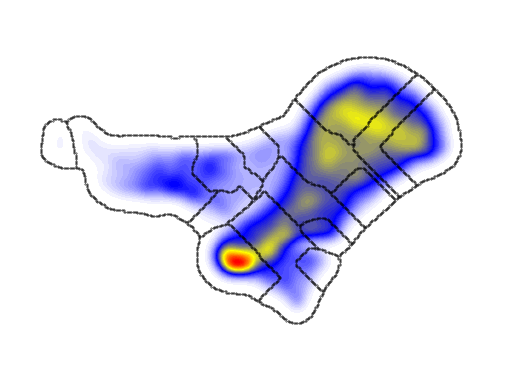

In [585]:
fig_density, ax_density = plot_umap_density_and_watershed_boundaries(
    wshed_path,
    axis_limit_tuple = ([-90, 60], [-60, 50]),
    include_axis_visualization= False, 
    cmap = 'default',
    save_pdf_path = '/Users/marv/Documents/work/soi/data_backup/Fish_moves_new/plasticity/trajectory_entropy/umap_density_watershed_boundaries_plot.pdf',
    plot_figure= False
)

### Watershed Clusters

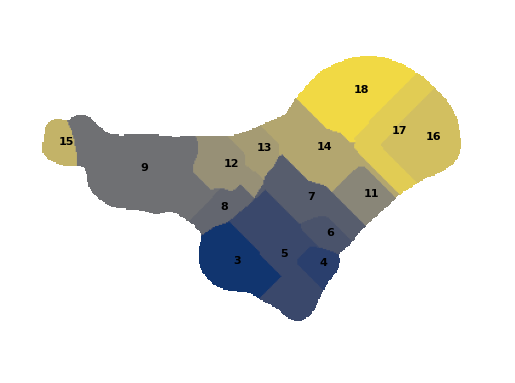

In [589]:
fig_density, ax_density = get_watershed_clusters_figure(
        cluster_embeddings = wshed_dict['LL'], 
        extent_factor = wshed_dict['xx'][0][-1], 
        original_figure_width = wshed_dict['density'].shape[0], 
        axis_limit_tuple = ([-90, 60], [-60, 50]),
        overloaded_figure=None, 
        include_axis_visualization= False, 
        cmap = 'cividis',
        save_pdf_path = '/Users/marv/Documents/work/soi/data_backup/Fish_moves_new/plasticity/trajectory_entropy/wshed_clusters_cividis_plot.pdf',
        plot_figure = False
    )

## Trajectories in UMAP Space
_using Watershed Boundaries_

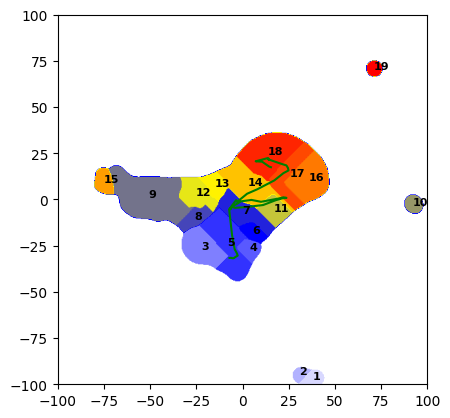

In [8]:

fig_umap_orig, ax_umap_orig = plot_umap_trajectories_and_watershed_characteristics(
        parameters,
        wshed_path,
        fk_list[0],
        day_list[0],
        mode = 'clusters', 
        data_restriction_limit= 50,
        axis_limit_tuple = ([-100, 100], [-100, 100]),
        trajectory_color= 'green',
        include_axis_visualization= True, 
        plot_figure= True
    )

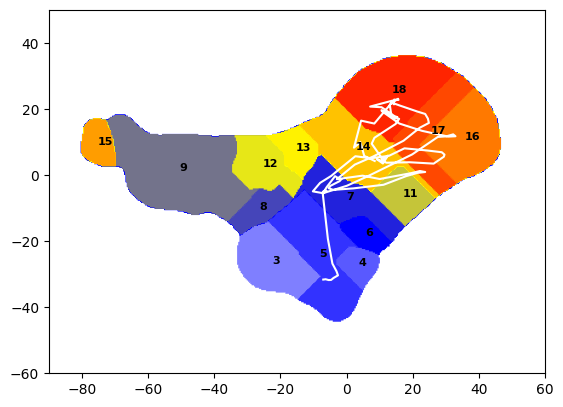

In [9]:
fig_umap_subsize, ax_umap_subsize = plot_umap_trajectories_and_watershed_characteristics(
        parameters,
        wshed_path,
        fk_list[0],
        day_list[0],
        mode = 'clusters', 
        data_restriction_limit= 100,
        axis_limit_tuple = ([-90, 60], [-60, 50]),
        trajectory_color= 'white',
        include_axis_visualization= True, 
        plot_figure= True
    )

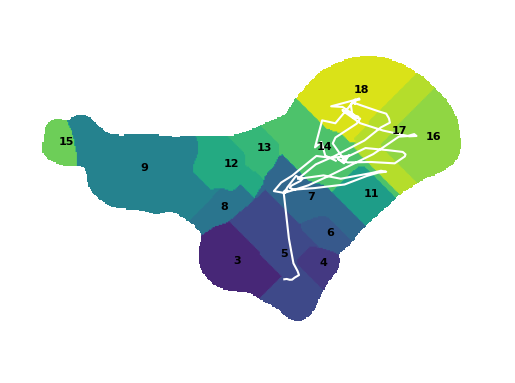

In [150]:
%matplotlib inline
import importlib
importlib.reload(data_factory.plotting)
from data_factory.plotting import * 

fig_umap_subsize_2, ax_umap_subsize_2 = plot_umap_trajectories_and_watershed_characteristics(
        parameters,
        wshed_path,
        fk_list[0],
        day_list[0],
        mode = 'clusters', 
        data_restriction_limit= 100,
        axis_limit_tuple = ([-90, 60], [-60, 50]),
        trajectory_color= 'white',
        include_axis_visualization= False, 
        cmap= 'viridis',
        plot_figure= True
    )

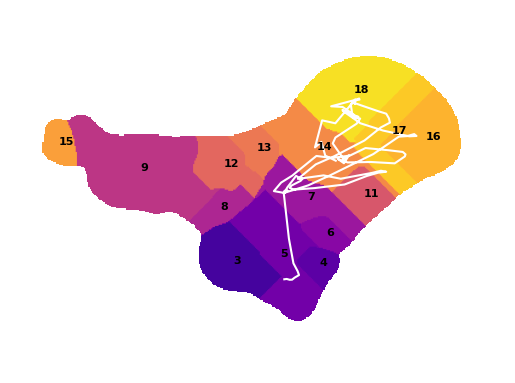

In [151]:
fig_umap_subsize_2, ax_umap_subsize_2 = plot_umap_trajectories_and_watershed_characteristics(
        parameters,
        wshed_path,
        fk_list[0],
        day_list[0],
        mode = 'clusters', 
        data_restriction_limit= 100,
        axis_limit_tuple = ([-90, 60], [-60, 50]),
        trajectory_color= 'white',
        include_axis_visualization= False, 
        cmap= 'plasma',
        plot_figure= True
)

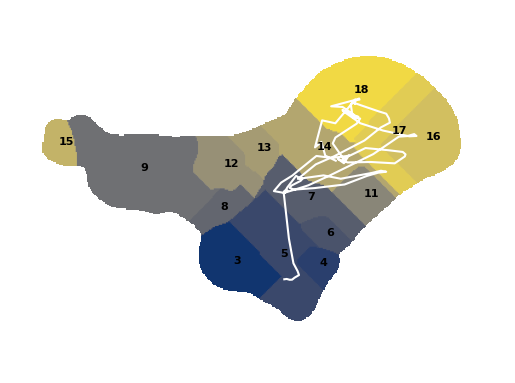

In [152]:
fig_umap_subsize_2, ax_umap_subsize_2 = plot_umap_trajectories_and_watershed_characteristics(
        parameters,
        wshed_path,
        fk_list[0],
        day_list[0],
        mode = 'clusters', 
        data_restriction_limit= 100,
        axis_limit_tuple = ([-90, 60], [-60, 50]),
        trajectory_color= 'white',
        include_axis_visualization= False, 
        cmap= 'cividis',
        plot_figure= True
)

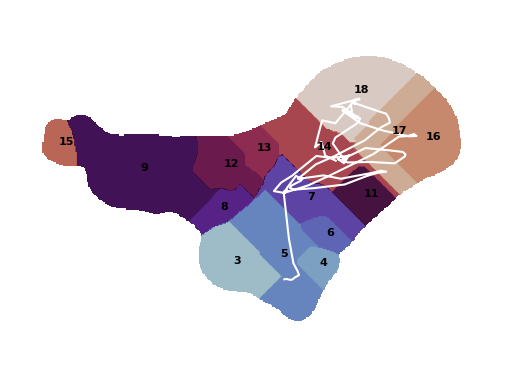

In [153]:
fig_umap_subsize_2, ax_umap_subsize_2 = plot_umap_trajectories_and_watershed_characteristics(
        parameters,
        wshed_path,
        fk_list[0],
        day_list[0],
        mode = 'clusters', 
        data_restriction_limit= 100,
        axis_limit_tuple = ([-90, 60], [-60, 50]),
        trajectory_color= 'white',
        include_axis_visualization= False, 
        cmap= 'twilight',
        plot_figure= True
)

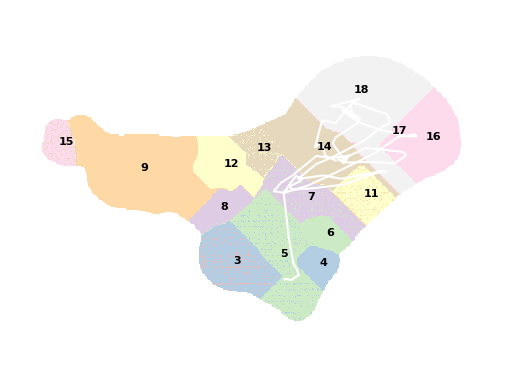

In [154]:
fig_umap_subsize_2, ax_umap_subsize_2 = plot_umap_trajectories_and_watershed_characteristics(
        parameters,
        wshed_path,
        fk_list[0],
        day_list[0],
        mode = 'clusters', 
        data_restriction_limit= 100,
        axis_limit_tuple = ([-90, 60], [-60, 50]),
        trajectory_color= 'white',
        include_axis_visualization= False, 
        cmap= 'Pastel1',
        plot_figure= True
)

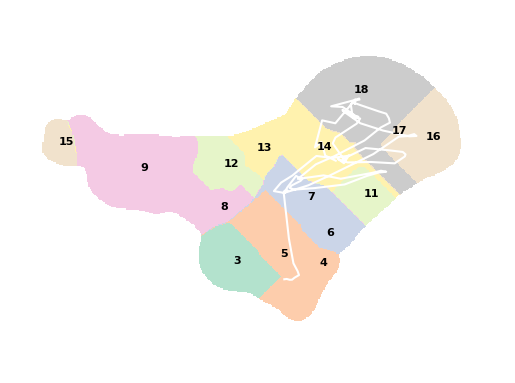

In [155]:
fig_umap_subsize_2, ax_umap_subsize_2 = plot_umap_trajectories_and_watershed_characteristics(
        parameters,
        wshed_path,
        fk_list[0],
        day_list[0],
        mode = 'clusters', 
        data_restriction_limit= 100,
        axis_limit_tuple = ([-90, 60], [-60, 50]),
        trajectory_color= 'white',
        include_axis_visualization= False, 
        cmap= 'Pastel2',
        plot_figure= True
)

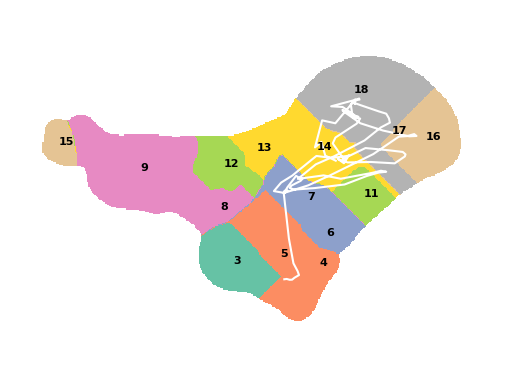

In [156]:
fig_umap_subsize_2, ax_umap_subsize_2 = plot_umap_trajectories_and_watershed_characteristics(
        parameters,
        wshed_path,
        fk_list[0],
        day_list[0],
        mode = 'clusters', 
        data_restriction_limit= 100,
        axis_limit_tuple = ([-90, 60], [-60, 50]),
        trajectory_color= 'white',
        include_axis_visualization= False, 
        cmap= 'Set2',
        plot_figure= True
)

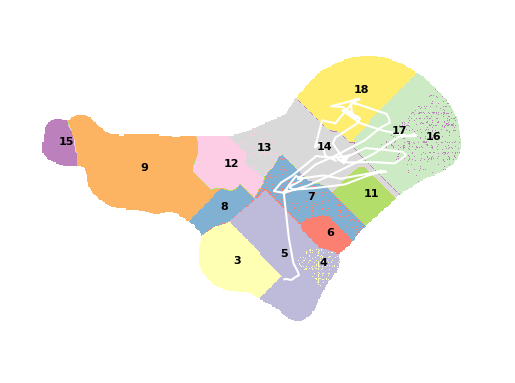

In [157]:
fig_umap_subsize_2, ax_umap_subsize_2 = plot_umap_trajectories_and_watershed_characteristics(
        parameters,
        wshed_path,
        fk_list[0],
        day_list[0],
        mode = 'clusters', 
        data_restriction_limit= 100,
        axis_limit_tuple = ([-90, 60], [-60, 50]),
        trajectory_color= 'white',
        include_axis_visualization= False, 
        cmap= 'Set3',
        plot_figure= True
)

### Trajectories with UMAP Density
_and Watershed Cluster Boundaries_

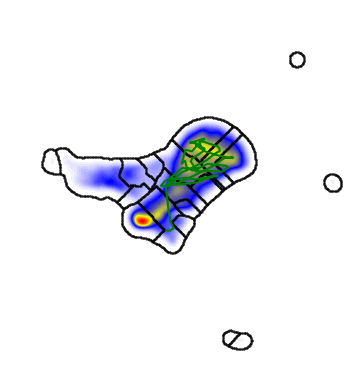

In [11]:
fig_density_traj, ax_density_traj = plot_umap_trajectories_and_watershed_characteristics(
        parameters,
        wshed_path,
        fk_list[0],
        day_list[0],
        mode = 'boundaries', 
        data_restriction_limit= 100,
        axis_limit_tuple = ([-100, 100], [-120, 100]),
        trajectory_color= 'green',
        include_axis_visualization= False, 
        plot_figure= True
    )

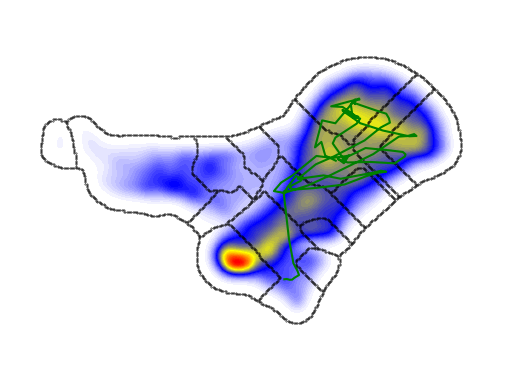

In [12]:
fig_density_traj_subsize, ax_density_traj_subsize = plot_umap_trajectories_and_watershed_characteristics(
        parameters,
        wshed_path,
        fk_list[0],
        day_list[0],
        mode = 'boundaries', 
        data_restriction_limit= 100,
        axis_limit_tuple = ([-90, 60], [-60, 50]),
        trajectory_color= 'green',
        include_axis_visualization= False, 
        plot_figure= True
    )

# Entropy Calculation

In [18]:
from data_factory.plasticity import *

In [62]:
n_clusters = n_c = 20

parameters.kmeans = n_c
get_clusters_func_wshed = lambda fk, d: get_regions_for_fish_key(wshed_dict,fk,d)
# for flag in [True, False]:
#     cluster_entropy_plot(parameters,get_clusters_func_wshed,fish_keys,parameters.kmeans,
#                     name=f"cluster_entropy_wshed",by_the_hour=flag)
'''Jumping into the function: data_factory.plasticity.cluster_entropy_plot()'''
days = get_days(parameters,prefix=fk_list[0].split("_")[0])
columns=fk_list
by_the_hour = True # TODO: flag tb set to false as well
index=list(range(1,1+(len(days)*HOURS_PER_DAY if by_the_hour else len(days))))
entro = np.empty((len(index), len(columns)))
entro.fill(np.nan)
for j,fk in enumerate(fk_list):
        for i,d in enumerate(get_days(parameters=parameters, prefix=fk)):
            print(f'j: {j}, i: {i}')
            clusters = get_clusters_func_wshed(fk,d)
            if clusters is not None:
                if by_the_hour:
                    time_df = load_trajectory_data_concat(parameters, fk, d)["df_time_index"]
                    time_split, cluster_hourly = split_into_batches(time_df, clusters)
                    h_of_split = [int(HOURS_PER_DAY*(i)+((t[0]-time_df[0])//(5*(60**2)))) for t in time_split]
                    entro[h_of_split,j] = [entropy_m(compute_cluster_distribution(c, n_clusters)) for c in cluster_hourly]
                else:
                    dist = compute_cluster_distribution(clusters,n_clusters)
                    entro[i,j]= entropy_m(dist)                

j: 0, i: 0
j: 0, i: 1
j: 0, i: 2
j: 0, i: 3
j: 0, i: 4
j: 0, i: 5
j: 0, i: 6
j: 0, i: 7
j: 0, i: 8
j: 0, i: 9
j: 0, i: 10
j: 0, i: 11
j: 0, i: 12
j: 0, i: 13
j: 0, i: 14
j: 0, i: 15
j: 0, i: 16
j: 0, i: 17
j: 0, i: 18
j: 0, i: 19
j: 1, i: 0
j: 1, i: 1
j: 1, i: 2
j: 1, i: 3
j: 1, i: 4
j: 1, i: 5
j: 1, i: 6
j: 1, i: 7
j: 1, i: 8
j: 1, i: 9
j: 1, i: 10
j: 1, i: 11
j: 1, i: 12
j: 1, i: 13
j: 1, i: 14
j: 1, i: 15
j: 1, i: 16
j: 1, i: 17
j: 1, i: 18
j: 1, i: 19
j: 1, i: 20
j: 1, i: 21
j: 1, i: 22
j: 1, i: 23
j: 1, i: 24
j: 1, i: 25
j: 1, i: 26
j: 1, i: 27
j: 2, i: 0
j: 2, i: 1
j: 2, i: 2
j: 2, i: 3
j: 2, i: 4
j: 2, i: 5
j: 2, i: 6
j: 2, i: 7
j: 2, i: 8
j: 2, i: 9
j: 2, i: 10
j: 2, i: 11
j: 2, i: 12
j: 2, i: 13
j: 2, i: 14
j: 2, i: 15
j: 2, i: 16
j: 2, i: 17
j: 2, i: 18
j: 2, i: 19
j: 2, i: 20
j: 2, i: 21
j: 2, i: 22
j: 2, i: 23
j: 2, i: 24
j: 2, i: 25
j: 2, i: 26
j: 3, i: 0
j: 3, i: 1
j: 3, i: 2
j: 3, i: 3
j: 3, i: 4
j: 3, i: 5
j: 3, i: 6
j: 3, i: 7
j: 3, i: 8
j: 3, i: 9
j: 3, i: 10
j: 3, i:

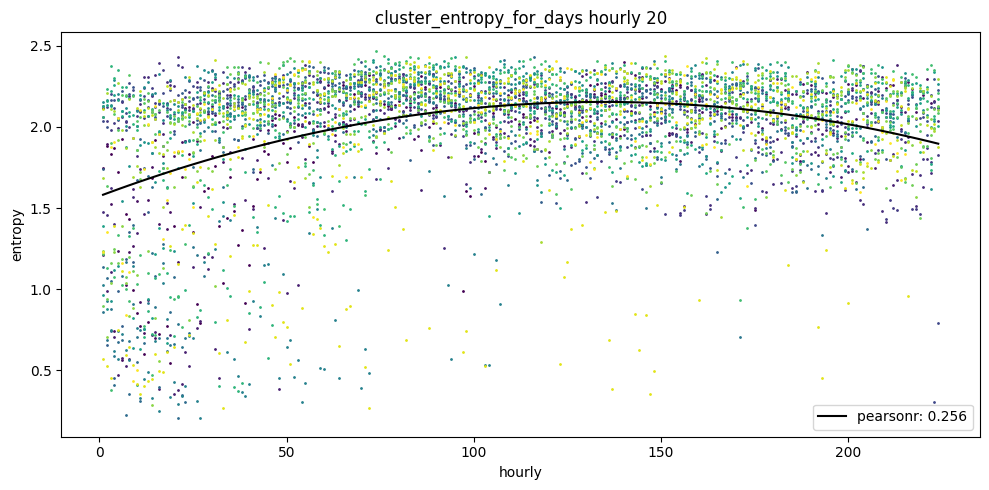

In [64]:
name = 'cluster_entropy_for_days'
fit_degree=2
forall=True

dir_p = f"{parameters.projectPath}/{DIR_PLASTCITY}/{name}"
os.makedirs(dir_p, exist_ok=True)
all_vals_df = pd.DataFrame(entro, columns=fish_keys, index=index)
if not by_the_hour:
    all_vals_df = all_vals_df.join(pd.DataFrame({f"date_{BLOCK1}":map(day2date,get_days(parameters, prefix=BLOCK1)), f"date_{BLOCK2}":map(day2date, get_days(parameters, prefix=BLOCK2))}, index=all_vals_df.index), how="left")
time_str = "hourly" if by_the_hour else "daily"

filename = f"{dir_p}/{name}_{time_str}_%.3d"%n_clusters
all_vals_df.to_csv(f"{filename}.csv")
fig = plot_index_columns(df=all_vals_df, columns=fish_keys, title=f"{name} {time_str} {n_clusters}", filename=filename, ylabel="entropy", xlabel=time_str, fit_degree=fit_degree, forall=forall)

In [158]:
import pandas as pd

In [164]:
entropy_df = pd.read_csv(os.path.join(projectPath, 'plasticity', 'cluster_entropy_for_days', 'cluster_entropy_for_days_hourly_020.csv'))
entropy_summary = entropy_df.describe()
entropy_summary


,Unnamed: 0,23442333_back,23484201_back,23484204_back,23520257_back,23520258_back,23520264_back,23520266_back,23520268_back,23520270_back,...,23484204_front,23520257_front,23520258_front,23520264_front,23520266_front,23520268_front,23520270_front,23520276_front,23520278_front,23520289_front
count,224.000000,155.000000,224.000000,216.000000,224.000000,224.000000,224.000000,224.000000,208.000000,208.000000,...,224.000000,223.000000,223.000000,224.000000,224.000000,224.000000,224.000000,217.000000,216.000000,210.000000
mean,112.500000,1.912679,2.013117,1.867352,2.032910,2.047275,2.129674,2.108790,2.065001,1.935047,...,2.068866,1.942716,2.050943,2.091437,1.972056,2.004484,2.127622,2.154710,1.604490,2.060939
std,64.807407,0.413907,0.290632,0.503238,0.246401,0.215798,0.194859,0.169599,0.300481,0.472969,...,0.155723,0.476154,0.421427,0.193996,0.251854,0.343484,0.175425,0.187309,0.639984,0.291531
min,1.000000,0.541804,0.561501,0.351803,1.254506,1.433402,0.304983,1.529437,0.448925,0.202695,...,1.448969,0.369274,0.379885,1.214224,0.896099,0.284906,1.291217,1.662252,0.264163,0.435546
25%,56.750000,1.789344,1.960775,1.811975,1.936931,1.924112,2.076653,2.011882,1.995721,1.895008,...,2.000926,1.827724,1.994453,1.980106,1.873708,1.955305,2.056293,2.046135,1.104223,1.960391
50%,112.500000,2.074021,2.093753,2.052409,2.096100,2.096672,2.150445,2.146476,2.142984,2.088408,...,2.090900,2.150932,2.201970,2.119257,2.027804,2.080726,2.157194,2.207957,1.852652,2.136736
75%,168.250000,2.190388,2.172572,2.185502,2.210239,2.223962,2.222448,2.238437,2.234777,2.211383,...,2.179148,2.252257,2.327489,2.220213,2.136456,2.199500,2.244170,2.297123,2.143532,2.239896
max,224.000000,2.321622,2.402887,2.382357,2.430369,2.383932,2.357442,2.401471,2.377536,2.430835,...,2.313920,2.414506,2.470431,2.423609,2.384930,2.400924,2.430031,2.436302,2.404396,2.434138


In [193]:
entropy_mean_list = []
for row in range (entropy_summary.shape[0]):
    entropy_mean_list.append(entropy_summary.iloc[row][1:].mean())

entropy_summary['mean_over_all'] = entropy_mean_list
    

In [232]:
pd.set_option('display.max_columns', None)
entropy_summary

,Unnamed: 0,23442333_back,23484201_back,23484204_back,23520257_back,23520258_back,23520264_back,23520266_back,23520268_back,23520270_back,23520276_back,23520278_back,23520289_back,23442333_front,23484201_front,23484204_front,23520257_front,23520258_front,23520264_front,23520266_front,23520268_front,23520270_front,23520276_front,23520278_front,23520289_front,mean_over_all
count,224.000000,155.000000,224.000000,216.000000,224.000000,224.000000,224.000000,224.000000,208.000000,208.000000,199.000000,216.000000,160.000000,224.000000,224.000000,224.000000,223.000000,223.000000,224.000000,224.000000,224.000000,224.000000,217.000000,216.000000,210.000000,214.125000
mean,112.500000,1.912679,2.013117,1.867352,2.032910,2.047275,2.129674,2.108790,2.065001,1.935047,1.899495,1.652367,2.238364,2.057396,2.090553,2.068866,1.942716,2.050943,2.091437,1.972056,2.004484,2.127622,2.154710,1.604490,2.060939,2.005345
std,64.807407,0.413907,0.290632,0.503238,0.246401,0.215798,0.194859,0.169599,0.300481,0.472969,0.463900,0.681971,0.132341,0.283793,0.314548,0.155723,0.476154,0.421427,0.193996,0.251854,0.343484,0.175425,0.187309,0.639984,0.291531,0.325888
min,1.000000,0.541804,0.561501,0.351803,1.254506,1.433402,0.304983,1.529437,0.448925,0.202695,0.588737,0.202690,1.491003,0.638459,0.407036,1.448969,0.369274,0.379885,1.214224,0.896099,0.284906,1.291217,1.662252,0.264163,0.435546,0.758480
25%,56.750000,1.789344,1.960775,1.811975,1.936931,1.924112,2.076653,2.011882,1.995721,1.895008,1.867723,1.078903,2.181291,1.955871,2.045505,2.000926,1.827724,1.994453,1.980106,1.873708,1.955305,2.056293,2.046135,1.104223,1.960391,1.888790
50%,112.500000,2.074021,2.093753,2.052409,2.096100,2.096672,2.150445,2.146476,2.142984,2.088408,2.070849,1.979576,2.268336,2.115996,2.168454,2.090900,2.150932,2.201970,2.119257,2.027804,2.080726,2.157194,2.207957,1.852652,2.136736,2.107109
75%,168.250000,2.190388,2.172572,2.185502,2.210239,2.223962,2.222448,2.238437,2.234777,2.211383,2.174662,2.176655,2.332474,2.249487,2.270558,2.179148,2.252257,2.327489,2.220213,2.136456,2.199500,2.244170,2.297123,2.143532,2.239896,2.222222
max,224.000000,2.321622,2.402887,2.382357,2.430369,2.383932,2.357442,2.401471,2.377536,2.430835,2.358159,2.404901,2.394571,2.411749,2.432536,2.313920,2.414506,2.470431,2.423609,2.384930,2.400924,2.430031,2.436302,2.404396,2.434138,2.400148


In [233]:
entropy_summary_t = entropy_summary.transpose()
entropy_summary_t

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,224.000,112.500000,64.807407,1.000000,56.750000,112.500000,168.250000,224.000000
23442333_back,155.000,1.912679,0.413907,0.541804,1.789344,2.074021,2.190388,2.321622
23484201_back,224.000,2.013117,0.290632,0.561501,1.960775,2.093753,2.172572,2.402887
23484204_back,216.000,1.867352,0.503238,0.351803,1.811975,2.052409,2.185502,2.382357
23520257_back,224.000,2.032910,0.246401,1.254506,1.936931,2.096100,2.210239,2.430369
23520258_back,224.000,2.047275,0.215798,1.433402,1.924112,2.096672,2.223962,2.383932
23520264_back,224.000,2.129674,0.194859,0.304983,2.076653,2.150445,2.222448,2.357442
23520266_back,224.000,2.108790,0.169599,1.529437,2.011882,2.146476,2.238437,2.401471
23520268_back,208.000,2.065001,0.300481,0.448925,1.995721,2.142984,2.234777,2.377536
23520270_back,208.000,1.935047,0.472969,0.202695,1.895008,2.088408,2.211383,2.430835


In [281]:
print('top 3: min mean entropy & std < 0.5: mean values')
entropy_summary_t[(entropy_summary_t['mean'] < 2) & (entropy_summary_t['std'] < 0.5)].sort_values(by='mean')

top 3: min mean entropy & std < 0.5: mean values


,count,mean,std,min,25%,50%,75%,max
23520276_back,199.0,1.899495,0.463900,0.588737,1.867723,2.070849,2.174662,2.358159
23442333_back,155.0,1.912679,0.413907,0.541804,1.789344,2.074021,2.190388,2.321622
23520270_back,208.0,1.935047,0.472969,0.202695,1.895008,2.088408,2.211383,2.430835
23520257_front,223.0,1.942716,0.476154,0.369274,1.827724,2.150932,2.252257,2.414506
23520266_front,224.0,1.972056,0.251854,0.896099,1.873708,2.027804,2.136456,2.384930


In [282]:
print('top 3: min mean<2 & std < 0.6: min values')
entropy_summary_t[(entropy_summary_t['mean'] < 2) & (entropy_summary_t['std']<0.6)].sort_values(by='min')

top 3: min mean<2 & std < 0.6: min values


,count,mean,std,min,25%,50%,75%,max
23520270_back,208.0,1.935047,0.472969,0.202695,1.895008,2.088408,2.211383,2.430835
23484204_back,216.0,1.867352,0.503238,0.351803,1.811975,2.052409,2.185502,2.382357
23520257_front,223.0,1.942716,0.476154,0.369274,1.827724,2.150932,2.252257,2.414506
23442333_back,155.0,1.912679,0.413907,0.541804,1.789344,2.074021,2.190388,2.321622
23520276_back,199.0,1.899495,0.463900,0.588737,1.867723,2.070849,2.174662,2.358159
23520266_front,224.0,1.972056,0.251854,0.896099,1.873708,2.027804,2.136456,2.384930


In [294]:
print('top3: max mean > 2 & std < 0.5: mean values')
entropy_summary_t[(entropy_summary_t['mean']> 2) & (entropy_summary_t['std']<0.5)].sort_values(by='mean', ascending=False)

top3: max mean > 2 & std < 0.5: mean values


,count,mean,std,min,25%,50%,75%,max
23520289_back,160.000,2.238364,0.132341,1.491003,2.181291,2.268336,2.332474,2.394571
23520276_front,217.000,2.154710,0.187309,1.662252,2.046135,2.207957,2.297123,2.436302
23520264_back,224.000,2.129674,0.194859,0.304983,2.076653,2.150445,2.222448,2.357442
23520270_front,224.000,2.127622,0.175425,1.291217,2.056293,2.157194,2.244170,2.430031
23520266_back,224.000,2.108790,0.169599,1.529437,2.011882,2.146476,2.238437,2.401471
23520264_front,224.000,2.091437,0.193996,1.214224,1.980106,2.119257,2.220213,2.423609
23484201_front,224.000,2.090553,0.314548,0.407036,2.045505,2.168454,2.270558,2.432536
23484204_front,224.000,2.068866,0.155723,1.448969,2.000926,2.090900,2.179148,2.313920
23520268_back,208.000,2.065001,0.300481,0.448925,1.995721,2.142984,2.234777,2.377536
23520289_front,210.000,2.060939,0.291531,0.435546,1.960391,2.136736,2.239896,2.434138


In [290]:
print('top3: max mean > 2 & std. < 0.5: max values')
entropy_summary_t[(entropy_summary_t['mean']>2) & (entropy_summary_t['std']<0.5)].sort_values(by='max', ascending=False)

top3: max mean > 2 & std. < 0.5: max values


,count,mean,std,min,25%,50%,75%,max
23520258_front,223.000,2.050943,0.421427,0.379885,1.994453,2.201970,2.327489,2.470431
23520276_front,217.000,2.154710,0.187309,1.662252,2.046135,2.207957,2.297123,2.436302
23520289_front,210.000,2.060939,0.291531,0.435546,1.960391,2.136736,2.239896,2.434138
23484201_front,224.000,2.090553,0.314548,0.407036,2.045505,2.168454,2.270558,2.432536
23520257_back,224.000,2.032910,0.246401,1.254506,1.936931,2.096100,2.210239,2.430369
23520270_front,224.000,2.127622,0.175425,1.291217,2.056293,2.157194,2.244170,2.430031
23520264_front,224.000,2.091437,0.193996,1.214224,1.980106,2.119257,2.220213,2.423609
23442333_front,224.000,2.057396,0.283793,0.638459,1.955871,2.115996,2.249487,2.411749
23484201_back,224.000,2.013117,0.290632,0.561501,1.960775,2.093753,2.172572,2.402887
23520266_back,224.000,2.108790,0.169599,1.529437,2.011882,2.146476,2.238437,2.401471


### entropy measures

| measure   | individual: value   |
|----|:-----:|
| mean entropy| 2.005345    |
| top 10 min mean entropy| 23520278_front    1.604490 </br> 23520278_back     1.652367 </br>  23484204_back     1.867352 </br>  23520276_back     1.899495 </br>  23442333_back     1.912679 </br>  23520270_back     1.935047 </br>  23520257_front    1.942716 </br>  23520266_front    1.972056 </br>  23520268_front    2.004484 </br>  23484201_back     2.013117 </br> |
| top 3: min mean entropy \& </br> std < 0.5 : mean | 23520276_back     1.899495 </br> 23442333_back     1.912679 </br> 23520270_back     1.935047 </br> |
| top 3: mean<2 & std < 0.6: min values | 23520270_back     0.202695 </br> 23484204_back     0.351803 </br> 23520257_front    0.369274 </br> |
|---|---|
|top 10 max mean entropy| 23520289_back     2.238364 </br> 23520276_front    2.154710 </br> 23520264_back     2.129674 </br> 23520270_front    2.127622 </br> 23520266_back     2.108790 </br> 23520264_front    2.091437 </br> 23484201_front    2.090553 </br> 23484204_front    2.068866 </br> 23520268_back     2.065001 </br> 23520289_front    2.060939 </br> |
| top 3 max mean entropy & </br> std < 0.5 | 23520289_back     2.238364 </br> 23520276_front    2.154710 </br> 23520264_back     2.129674 </br> |
| top3: max mean > 2 & std. < 0.5: max values | 23520258_front    2.470431 </br> 23520276_front    2.436302 </br> 23520289_front    2.434138 </br>  |


In [383]:
# get min entropy individuals (hrs: 20, 19, 36)
first_min= entropy_df['23520270_back'].sort_values(ascending=True)
second_min = entropy_df['23484204_back'].sort_values()
third_min = entropy_df['23520257_front'].sort_values()


In [309]:
# get max entropy individuals (hrs: 73, 150, 87)
first_max = entropy_df['23520258_front'].sort_values(ascending=False)
second_max = entropy_df['23520276_front'].sort_values(ascending=False)
third_max = entropy_df['23520289_front'].sort_values(ascending=False)

In [550]:
# interesting samples for min:
entropy_df['23442333_back'].sort_values(ascending=True) # h: 18, e: 0.541804
entropy_df['23520276_back'].sort_values(ascending=True) # h: 3, e: 0.588737
entropy_df['23520266_front'].sort_values(ascending=True) # h: 0, e: 0.896099


0      0.896099
1      0.940244
6      1.075652
8      1.113377
4      1.159718
         ...   
194    2.314972
176    2.320325
68     2.324194
34     2.326439
199    2.384930
Name: 23520266_front, Length: 224, dtype: float64

In [534]:
# interesting samples for max: 
entropy_df['23484201_front'].sort_values(ascending=False) # h: 94, e: 2.432536
entropy_df['23520257_back'].sort_values(ascending=False) # h: 20, e: 2.430369
entropy_df['23520270_front'].sort_values(ascending=False) # h: 97, e: 2.430031



97     2.430031
53     2.405739
191    2.394440
172    2.386486
145    2.363340
         ...   
146    1.637410
10     1.628801
16     1.507321
165    1.442648
117    1.291217
Name: 23520270_front, Length: 224, dtype: float64

## trajectory plotting for min entropies

In [565]:
%matplotlib inline
import importlib
importlib.reload(data_factory.plotting)
from data_factory.plotting import * 

1. low entropy individual:
* hour: 20
    * -> day: 3, hour 4
    * datapoints: [72.000 - 90000]
    * corrected: [71940 - 89920]
* entropy: 0.202695

In [506]:
entropy_summary['23520270_back']

count    208.000000
mean       1.935047
std        0.472969
min        0.202695
25%        1.895008
50%        2.088408
75%        2.211383
max        2.430835
Name: 23520270_back, dtype: float64

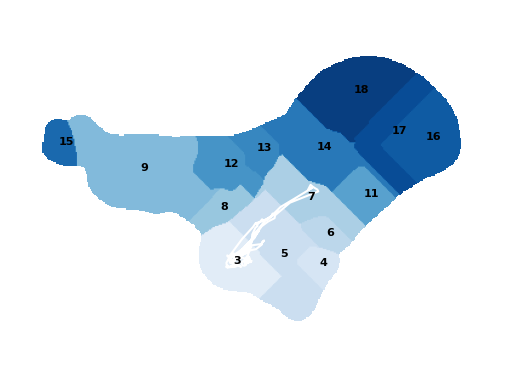

In [580]:
fig_umap_subsize_2, ax_umap_subsize_2 = plot_umap_trajectories_and_watershed_characteristics(
        parameters,
        wshed_path,
        'block1_23520270_back',
        day_list[2],
        mode = 'clusters', 
        data_restriction= {'interval': [71940, 89920]},
        data_restriction_additional={'limit': 300},
        axis_limit_tuple = ([-90, 60], [-60, 50]),
        trajectory_color= 'white',
        include_axis_visualization= False, 
        cmap= 'Blues',
        save_pdf_path= '/Users/marv/Documents/work/soi/data_backup/Fish_moves_new/plasticity/trajectory_entropy/low_entropy_1_Blues.pdf',
        plot_figure= True
)

2. low entropy individual
* hour 19:
    * ~ day 3: hour 3
    * datapoints: [54.000 - 72.000]
    * corrected: [53974 - 71964]


In [389]:
entropy_summary['23484204_back']

count    216.000000
mean       1.867352
std        0.503238
min        0.351803
25%        1.811975
50%        2.052409
75%        2.185502
max        2.382357
Name: 23484204_back, dtype: float64

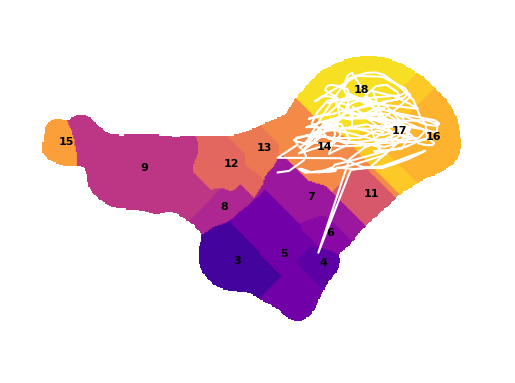

In [556]:
fig_umap_subsize_2, ax_umap_subsize_2 = plot_umap_trajectories_and_watershed_characteristics(
        parameters,
        wshed_path,
        'block1_23484204_back',
        day_list[2],
        mode = 'clusters', 
        data_restriction= {'interval': [53974, 71964]},
        data_restriction_additional={'limit': 300},
        axis_limit_tuple = ([-90, 60], [-60, 50]),
        trajectory_color= 'white',
        include_axis_visualization= False, 
        cmap= 'plasma',
        # save_pdf_path= '/Users/marv/Documents/work/soi/data_backup/Fish_moves_new/plasticity/trajectory_entropy/low_entropy_1.pdf',
        plot_figure= True
)

3. low entropy:
* hour: 36
    * -> day: 5, hour: 4
    * dataset: [72.000 - 90.000]
    * corrected: [71555 - 89471]

In [390]:
entropy_summary['23520257_front']

count    223.000000
mean       1.942716
std        0.476154
min        0.369274
25%        1.827724
50%        2.150932
75%        2.252257
max        2.414506
Name: 23520257_front, dtype: float64

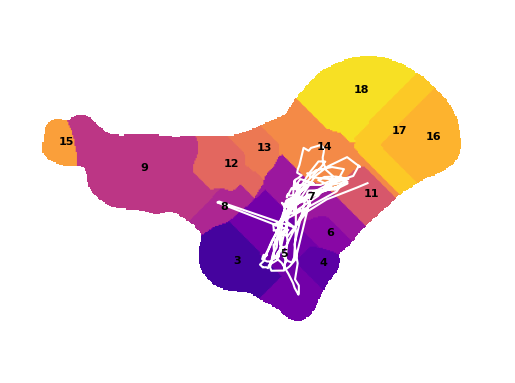

In [557]:
fig_umap_subsize_2, ax_umap_subsize_2 = plot_umap_trajectories_and_watershed_characteristics(
        parameters,
        wshed_path,
        'block1_23520257_front',
        day_list[4],
        mode = 'clusters', 
        data_restriction= {'interval': [71555, 89471]},
        data_restriction_additional={'limit': 300},
        axis_limit_tuple = ([-90, 60], [-60, 50]),
        trajectory_color= 'white',
        include_axis_visualization= False, 
        cmap= 'plasma',
        plot_figure= True
)

#### other samples

* hour: 18
    * day: 3, hour: 2
    * dataframe: [17989, 35986]

In [537]:
entropy_summary['23442333_back']

count    155.000000
mean       1.912679
std        0.413907
min        0.541804
25%        1.789344
50%        2.074021
75%        2.190388
max        2.321622
Name: 23442333_back, dtype: float64

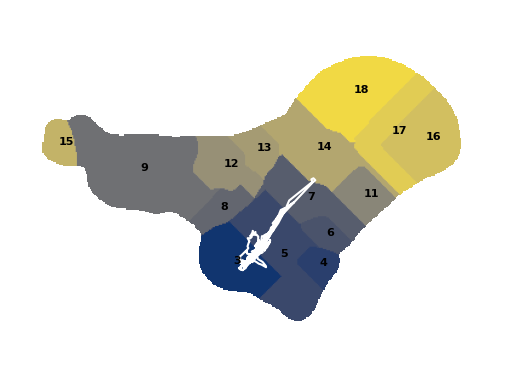

In [574]:
fig_umap_subsize_2, ax_umap_subsize_2 = plot_umap_trajectories_and_watershed_characteristics(
        parameters,
        wshed_path,
        'block1_23442333_back',
        day_list[1],
        mode = 'clusters', 
        data_restriction= {'interval': [17989, 35986]},
        data_restriction_additional={'limit': 300},
        axis_limit_tuple = ([-90, 60], [-60, 50]),
        trajectory_color= 'white',
        include_axis_visualization= False, 
        cmap= 'cividis',
        save_pdf_path= '/Users/marv/Documents/work/soi/data_backup/Fish_moves_new/plasticity/trajectory_entropy/low_entropy_2_cividis.pdf',
        plot_figure= True
)

* hour: 3
    * day: 1, h: 3
    * dataset: [52459, 69998]

In [559]:
entropy_summary['23520276_back']

count    199.000000
mean       1.899495
std        0.463900
min        0.588737
25%        1.867723
50%        2.070849
75%        2.174662
max        2.358159
Name: 23520276_back, dtype: float64

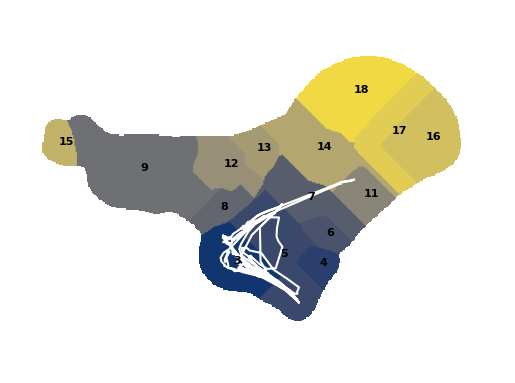

In [575]:
fig_umap_subsize_2, ax_umap_subsize_2 = plot_umap_trajectories_and_watershed_characteristics(
        parameters,
        wshed_path,
        'block1_23520276_back',
        day_list[0],
        mode = 'clusters', 
        data_restriction= {'interval': [52459, 69998]},
        data_restriction_additional={'limit': 300},
        axis_limit_tuple = ([-90, 60], [-60, 50]),
        trajectory_color= 'white',
        include_axis_visualization= False, 
        cmap= 'cividis',
        save_pdf_path= '/Users/marv/Documents/work/soi/data_backup/Fish_moves_new/plasticity/trajectory_entropy/low_entropy_3_cividis.pdf',
        plot_figure= True
)

* hour: 0
    * day: 1, hour: 0
    * dataframe: [0, 17936]

In [551]:
entropy_summary['23520266_front']

count    224.000000
mean       1.972056
std        0.251854
min        0.896099
25%        1.873708
50%        2.027804
75%        2.136456
max        2.384930
Name: 23520266_front, dtype: float64

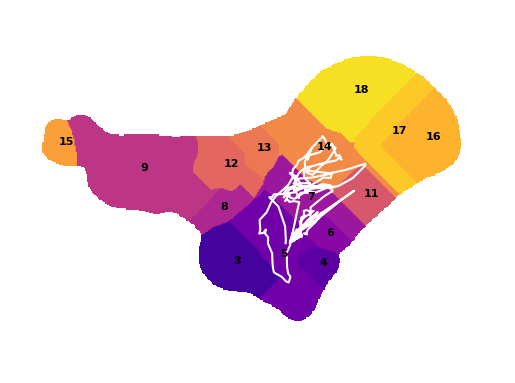

In [561]:
fig_umap_subsize_2, ax_umap_subsize_2 = plot_umap_trajectories_and_watershed_characteristics(
        parameters,
        wshed_path,
        'block1_23520266_front',
        day_list[0],
        mode = 'clusters', 
        data_restriction= {'interval': [0, 17936]},
        data_restriction_additional={'limit': 300},
        axis_limit_tuple = ([-90, 60], [-60, 50]),
        trajectory_color= 'white',
        include_axis_visualization= False, 
        cmap= 'plasma',
        plot_figure= True
)

## trajectory plotting for max entropies

1. high entropy sample
* hour 73:
    * -> day 10, hour: 1
    * datapoints: [18000 - 36000]
    * corrected: [17996 - 35986]
    

In [391]:
entropy_summary['23520258_front']

count    223.000000
mean       2.050943
std        0.421427
min        0.379885
25%        1.994453
50%        2.201970
75%        2.327489
max        2.470431
Name: 23520258_front, dtype: float64

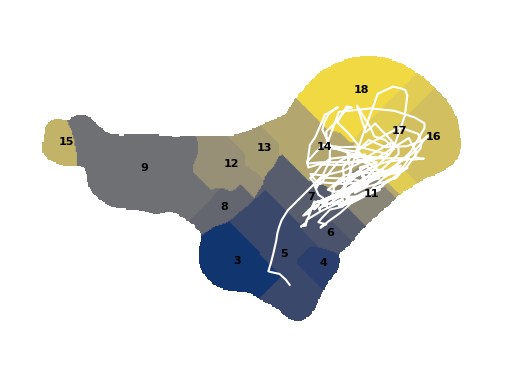

In [576]:
fig_umap_subsize_2, ax_umap_subsize_2 = plot_umap_trajectories_and_watershed_characteristics(
        parameters,
        wshed_path,
        'block1_23520258_front',
        day_list[9],
        mode = 'clusters', 
        data_restriction= {'interval': [17996, 35986]},
        data_restriction_additional={'limit': 300},
        axis_limit_tuple = ([-90, 60], [-60, 50]),
        trajectory_color= 'white',
        include_axis_visualization= False, 
        cmap= 'cividis',
        save_pdf_path= '/Users/marv/Documents/work/soi/data_backup/Fish_moves_new/plasticity/trajectory_entropy/high_entropy_1_cividis.pdf',
        plot_figure= True
)

2. high entropy
* hour 150
    * -> day 19, hour 6
    * dataset: [108.000 - 126.000]
    * corrected: [107937 - 125842]

In [392]:
entropy_summary['23520276_front']

count    217.000000
mean       2.154710
std        0.187309
min        1.662252
25%        2.046135
50%        2.207957
75%        2.297123
max        2.436302
Name: 23520276_front, dtype: float64

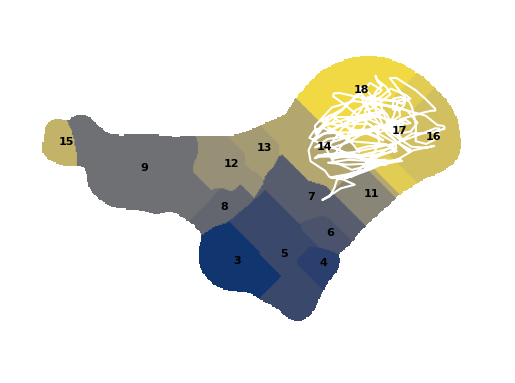

In [577]:
fig_umap_subsize_2, ax_umap_subsize_2 = plot_umap_trajectories_and_watershed_characteristics(
        parameters,
        wshed_path,
        'block1_23520276_front',
        day_list[18],
        mode = 'clusters', 
        data_restriction= {'interval': [107937, 125842]},
        data_restriction_additional={'limit': 300},
        axis_limit_tuple = ([-90, 60], [-60, 50]),
        trajectory_color= 'white',
        include_axis_visualization= False, 
        cmap= 'cividis',
        save_pdf_path= '/Users/marv/Documents/work/soi/data_backup/Fish_moves_new/plasticity/trajectory_entropy/high_entropy_2_cividis.pdf',
        plot_figure= True
)

3. high entropy 
* hour: 87
    * -> day 11, hour 7
    * dataset: [126.000 - 144.000]
    * corrected: [125863 - 143510]

In [393]:
entropy_summary['23520289_front']

count    210.000000
mean       2.060939
std        0.291531
min        0.435546
25%        1.960391
50%        2.136736
75%        2.239896
max        2.434138
Name: 23520289_front, dtype: float64

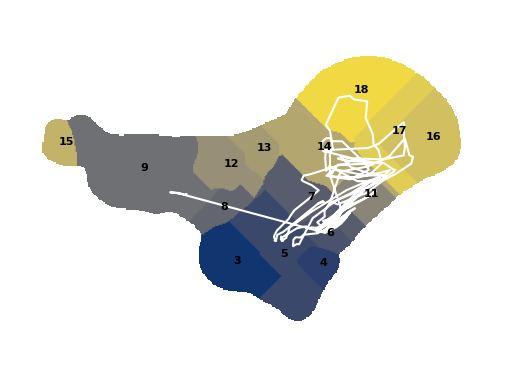

In [578]:
fig_umap_subsize_2, ax_umap_subsize_2 = plot_umap_trajectories_and_watershed_characteristics(
        parameters,
        wshed_path,
        'block1_23520289_front',
        day_list[10],
        mode = 'clusters', 
        data_restriction= {'interval': [125863, 143510]},
        data_restriction_additional={'limit': 300},
        axis_limit_tuple = ([-90, 60], [-60, 50]),
        trajectory_color= 'white',
        include_axis_visualization= False, 
        cmap= 'cividis',
        save_pdf_path= '/Users/marv/Documents/work/soi/data_backup/Fish_moves_new/plasticity/trajectory_entropy/high_entropy_3_cividis.pdf',
        plot_figure= True
)

### recalculating entropies

In [474]:
    # @time: trajectory_data_concat_dict['df_time_index']
    # @data: get_regions_for_fish_key
    # => split_into_batches()-> batches, times

In [447]:
trajectory_data_concat_dict = load_trajectory_data_concat(parameters=parameters, fk='block1_23520270_back', day=day_list[2])
time_df_new = trajectory_data_concat_dict['df_time_index']

In [475]:
regions_for_fish_key_arr = get_regions_for_fish_key(wshedfile= wshed_dict, fish_key='block1_23520270_back', day=day_list[2])
# regions_for_fish_key_arr.shape

In [449]:
time_split_new, cluster_hourly_new = split_into_batches(time_df_new, regions_for_fish_key_arr)

In [450]:
HOURS_PER_DAY = 8
h_of_split_new = [int(HOURS_PER_DAY*(i)+((t[0]-time_df_new[0])//(5*(60**2)))) for t in time_split_new]

In [466]:
by_the_hour = True
columns=fk_list
days = get_days(parameters,prefix=fk_list[0].split("_")[0])
index=list(range(1,1+(len(days)*HOURS_PER_DAY if by_the_hour else len(days))))
entro_new = np.empty((len(index), len(columns)))
entro_new.fill(np.nan)
entro_new[h_of_split_new,0] = [entropy_m(compute_cluster_distribution(c, n_clusters)) for c in cluster_hourly]

In [525]:
entro_new[:,0][-16:-8]

array([1.96652565, 2.15723327, 1.90336125, 2.29108549, 1.84212186,
       1.67202576, 1.83089987, 2.10790468])

In [505]:
sum = 0
for el in time_split_new:
    print(len(el))
    sum += len(el)
    print(f'\tsum: {sum}')
    

17996
	sum: 17996
17988
	sum: 35984
17987
	sum: 53971
17969
	sum: 71940
17980
	sum: 89920
17938
	sum: 107858
17954
	sum: 125812
17652
	sum: 143464


In [510]:
def get_time_point_for_trajectory_plotting(
    parameters, wshed_dict, fk, day
):
    print(f'---fk: {fk}, day: {day}')
    trajectory_data_concat_dict = load_trajectory_data_concat(parameters=parameters, fk=fk, day=day)
    time_df_new = trajectory_data_concat_dict['df_time_index']
    regions_for_fish_key_arr = get_regions_for_fish_key(wshedfile= wshed_dict, fish_key=fk, day=day)
    time_split_new, cluster_hourly_new = split_into_batches(time_df_new, regions_for_fish_key_arr)
    sum = 0
    index = 0
    for el in time_split_new:
        index +=1
        print(f'index: {index}: {len(el)}')
        sum += len(el)
        print(f'\tsum: {sum}')
    

In [512]:
get_time_point_for_trajectory_plotting(parameters, wshed_dict, 'block1_23520270_back', day_list[2])


---fk: block1_23520270_back, day: 20210913_060000
index: 1: 17996
	sum: 17996
index: 2: 17988
	sum: 35984
index: 3: 17987
	sum: 53971
index: 4: 17969
	sum: 71940
index: 5: 17980
	sum: 89920
index: 6: 17938
	sum: 107858
index: 7: 17954
	sum: 125812
index: 8: 17652
	sum: 143464


In [513]:
get_time_point_for_trajectory_plotting(parameters, wshed_dict, 'block1_23484204_back', day_list[2])

---fk: block1_23484204_back, day: 20210913_060000
index: 1: 17996
	sum: 17996
index: 2: 17989
	sum: 35985
index: 3: 17989
	sum: 53974
index: 4: 17990
	sum: 71964
index: 5: 17990
	sum: 89954
index: 6: 17914
	sum: 107868
index: 7: 17990
	sum: 125858
index: 8: 17651
	sum: 143509


In [515]:
get_time_point_for_trajectory_plotting(parameters, wshed_dict, 'block1_23520257_front', day_list[4])

---fk: block1_23520257_front, day: 20210915_060000
index: 1: 17971
	sum: 17971
index: 2: 17982
	sum: 35953
index: 3: 17929
	sum: 53882
index: 4: 17673
	sum: 71555
index: 5: 17916
	sum: 89471
index: 6: 17877
	sum: 107348
index: 7: 17903
	sum: 125251
index: 8: 17471
	sum: 142722


In [518]:
get_time_point_for_trajectory_plotting(parameters, wshed_dict, 'block1_23520258_front', day_list[9])

---fk: block1_23520258_front, day: 20210920_060000
index: 1: 17996
	sum: 17996
index: 2: 17990
	sum: 35986
index: 3: 17988
	sum: 53974
index: 4: 17990
	sum: 71964
index: 5: 17990
	sum: 89954
index: 6: 17892
	sum: 107846
index: 7: 17989
	sum: 125835
index: 8: 17510
	sum: 143345


In [520]:
get_time_point_for_trajectory_plotting(parameters, wshed_dict, 'block1_23520276_front', day_list[18])

---fk: block1_23520276_front, day: 20210929_060000
index: 1: 17997
	sum: 17997
index: 2: 17989
	sum: 35986
index: 3: 17987
	sum: 53973
index: 4: 17983
	sum: 71956
index: 5: 17987
	sum: 89943
index: 6: 17994
	sum: 107937
index: 7: 17905
	sum: 125842
index: 8: 17637
	sum: 143479


In [522]:
get_time_point_for_trajectory_plotting(parameters, wshed_dict, 'block1_23520289_front', day_list[10])

---fk: block1_23520289_front, day: 20210921_060000
index: 1: 17991
	sum: 17991
index: 2: 17986
	sum: 35977
index: 3: 17957
	sum: 53934
index: 4: 17982
	sum: 71916
index: 5: 17984
	sum: 89900
index: 6: 17986
	sum: 107886
index: 7: 17977
	sum: 125863
index: 8: 17647
	sum: 143510


In [541]:
get_time_point_for_trajectory_plotting(parameters, wshed_dict, 'block1_23442333_back', day_list[2])

---fk: block1_23442333_back, day: 20210913_060000
index: 1: 17997
	sum: 17997
index: 2: 17989
	sum: 35986
index: 3: 17990
	sum: 53976
index: 4: 17990
	sum: 71966
index: 5: 17990
	sum: 89956
index: 6: 17995
	sum: 107951
index: 7: 17988
	sum: 125939
index: 8: 17653
	sum: 143592


In [548]:
get_time_point_for_trajectory_plotting(parameters, wshed_dict, 'block1_23520276_back', day_list[0])

---fk: block1_23520276_back, day: 20210911_060000
index: 1: 17548
	sum: 17548
index: 2: 17362
	sum: 34910
index: 3: 17549
	sum: 52459
index: 4: 17539
	sum: 69998
index: 5: 17565
	sum: 87563
index: 6: 17474
	sum: 105037
index: 7: 17554
	sum: 122591
index: 8: 17208
	sum: 139799


In [552]:
get_time_point_for_trajectory_plotting(parameters, wshed_dict, 'block1_23520266_front', day_list[0])


---fk: block1_23520266_front, day: 20210911_060000
index: 1: 17936
	sum: 17936
index: 2: 17965
	sum: 35901
index: 3: 17981
	sum: 53882
index: 4: 17977
	sum: 71859
index: 5: 17987
	sum: 89846
index: 6: 17966
	sum: 107812
index: 7: 17949
	sum: 125761
index: 8: 17649
	sum: 143410


presentation figures
* scatter umap
* density umap
* density + grid 
* watershed boundaries
* watershed clusters
